In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Topological Ordering of Animal Species

In [2]:
species = np.genfromtxt('data/animalnames.txt', dtype='str')
props = np.genfromtxt('data/animals.dat', dtype='int', delimiter=',').reshape(-1, 84)

In [28]:
N,M = props.shape
num_nodes = 100
W = np.random.randn(num_nodes,M)
lr = 0.2
epochs = 20
neighbourhood_start = 50
neigh_decay = neighbourhood_start/epochs

for e in range(epochs):
    neighbourhood = round(neighbourhood_start - neigh_decay*e)
    for idx in range(N):
        p = props[idx]
        W_p = W-p
        distances = np.linalg.norm(W_p, axis=1)
        winner = np.argmin(distances)
        for node in range(num_nodes):
            if node >= winner-neighbourhood and node <= winner+neighbourhood:
                W[node] = W[node] + lr*(p-W[node])

pos = [-1] * N
for idx in range(N):
    p = props[idx]
    W_p = W-p
    distances = np.linalg.norm(W_p, axis=1)
    winner = np.argmin(distances)
    pos[idx] = winner

grouped = [(species[i],pos[i]) for i in range(N)]
grouped.sort(key=lambda t: t[1])
for i in range(N): print(grouped[i])

("'camel'", 0)
("'giraffe'", 0)
("'horse'", 3)
("'pig'", 3)
("'antelop'", 6)
("'rabbit'", 7)
("'kangaroo'", 10)
("'elephant'", 11)
("'bat'", 15)
("'rat'", 20)
("'skunk'", 24)
("'ape'", 27)
("'cat'", 30)
("'lion'", 30)
("'dog'", 33)
("'hyena'", 36)
("'bear'", 39)
("'walrus'", 45)
("'crocodile'", 51)
("'seaturtle'", 52)
("'frog'", 55)
("'ostrich'", 62)
("'penguin'", 65)
("'duck'", 69)
("'pelican'", 69)
("'spider'", 78)
("'moskito'", 87)
("'housefly'", 90)
("'butterfly'", 93)
("'beetle'", 96)
("'dragonfly'", 98)
("'grasshopper'", 98)


# Cyclic tour

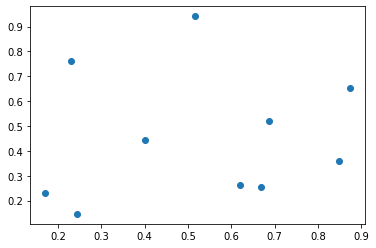

In [4]:
import io
s = io.BytesIO(open('data/cities.dat', 'rb').read().replace(b';',b''))
city = np.genfromtxt(s, dtype='float', delimiter=',', comments='%')
plt.scatter(city[:,0], city[:,1])
plt.show()

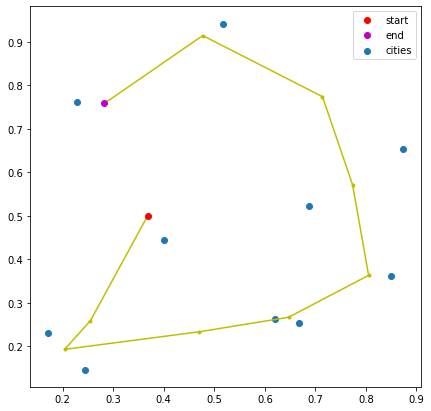

In [62]:
N,M = city.shape
num_nodes = N
W = np.random.randn(num_nodes,M)
lr = 0.2
epochs = 20
neighbourhood_start = 2
neigh_decay = neighbourhood_start/epochs

for e in range(epochs): 
    neighbourhood = round(neighbourhood_start - neigh_decay*e) 
    for idx in range(N):
        c = city[idx]
        W_c = W-c
        distances = np.linalg.norm(W_c, axis=1)
        winner = np.argmin(distances)
        for node in range(num_nodes):
            if node >= winner-neighbourhood and node <= winner+neighbourhood:
                W[node] = W[node] + lr*(c-W[node])
            elif winner+neighbourhood >= N and node <= (winner+neighbourhood) % N:
                W[node] = W[node] + lr*(c-W[node])
            elif winner-neighbourhood < 0 and node >= (winner-neighbourhood) % N:
                W[node] = W[node] + lr*(c-W[node])

pos = [-1] * N
plt.figure(figsize=(7,7))
plt.scatter(city[:,0], city[:,1], label='cities')
plt.plot(W[:,0], W[:,1], 'y.-')
plt.plot(W[0,0],W[0,1], 'ro', label='start')
plt.plot(W[N-1,0],W[N-1,1], 'mo', label='end')
plt.legend()
plt.show()